In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/vigneshT241801508/FOML/refs/heads/main/car_price_prediction.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print(df.head())

✅ Dataset loaded successfully!
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Lef

In [18]:
df = df.drop(columns=['ID', 'Levy', 'Color'], errors='ignore')

In [19]:
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=False).astype(float)

In [20]:
df['Engine volume'] = df['Engine volume'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-143463741.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Engine volume'] = df['Engine volume'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


In [21]:
categorical_cols = [
    'Manufacturer', 'Model', 'Category', 'Leather interior',
    'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel'
]


In [22]:

df = df.dropna(subset=['Price'])

In [23]:
X = df.drop('Price', axis=1)
y = df['Price']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}


In [30]:
for name, model in models.items():
    print(f"🔹 Training {name}...")
    try:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results[name] = {'R2 Score': r2, 'MAE': mae, 'RMSE': rmse}
        print(f"✅ Done: {name} (R²={r2:.3f}, MAE={mae:.2f}, RMSE={rmse:.2f})")

    except Exception as e:
        print(f"❌ Error with {name}: {e}")

# Display results
if results:
    results_df = pd.DataFrame(results).T
    print("\n📊 Model Performance Comparison:")
    print(results_df)
else:
    print("⚠️ No models trained successfully.")

🔹 Training Linear Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Done: Linear Regression (R²=-0.012, MAE=12525.25, RMSE=17757.12)
🔹 Training Decision Tree...


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Done: Decision Tree (R²=0.563, MAE=5266.53, RMSE=11675.70)
🔹 Training Random Forest...
✅ Done: Random Forest (R²=0.706, MAE=4367.03, RMSE=9574.73)

📊 Model Performance Comparison:
                   R2 Score           MAE          RMSE
Linear Regression -0.011934  12525.248844  17757.119445
Decision Tree      0.562505   5266.530023  11675.697074
Random Forest      0.705788   4367.030278   9574.733487


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


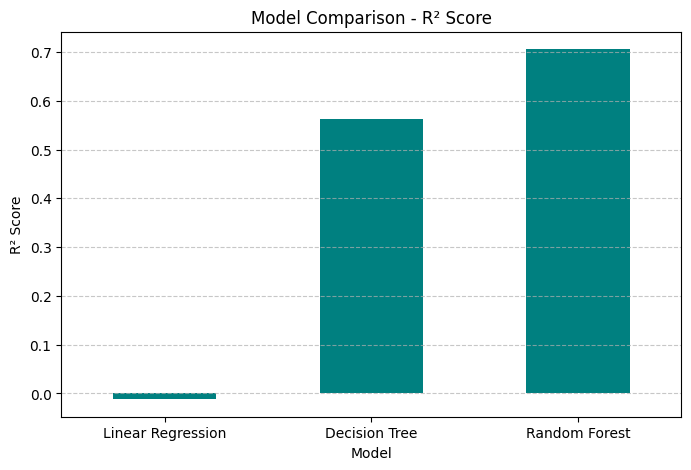


✅ Project executed successfully! Best model likely: Random Forest


In [31]:
plt.figure(figsize=(8,5))
results_df['R2 Score'].plot(kind='bar', color='teal')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n✅ Project executed successfully! Best model likely:", results_df['R2 Score'].idxmax())
